In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from datetime import timedelta

# visualization
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

%matplotlib inline

# configure visualizations
sns.set_style('whitegrid')
figsize=(8,6)

In [2]:
def load_df(path, columns=None, use_threads=True):
    try:
        return pq.read_table(path, columns=columns, use_threads=use_threads).to_pandas()
    except Exception as e:
        print(e)

def downcast_ints(df):
    # downcast int types
    df_int = df.select_dtypes(include=['int'])
    converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
    df[converted_int.columns] = converted_int
    
    return df
        
def prepare(path,cols):

    df = load_df(path,cols)
    df = df.reset_index(drop=True)
    df = downcast_ints(df)
    
    return df

In [3]:
def pieOthers(dfVars,dfVals,threshold):
    df = pd.DataFrame(
        data = {'var': dfVars, 'value' : dfVals},
        ).sort_values('value', ascending = False)
    
    if threshold > 0 :
        df2 = df[:threshold].copy()
        new_row = pd.DataFrame(data = {
            'var' : ['Others'],
            'value' : [dfVals[threshold:].sum()]
        })

        df2 = pd.concat([df2, new_row])
    else:
        df2 = df
        
    percent = 100.*df2['value']/df2['value'].sum()
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(df2['var'], percent)]
    #labels = ['{0} - {1}'.format(i,j) for i,j in zip(df2['var'], df2['value'])]
    
    colorsX = plt.cm.tab20.colors
    patches, texts = plt.pie(df2['value'], shadow=True, startangle=90, colors = colorsX)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()


In [4]:
cols = ['network_status', 'screen_brightness', 'screen_on', 'timezone', 'country_code']
df = prepare('1-parquet-files/samplesPeriods.parquet',cols)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066127 entries, 0 to 23066126
Data columns (total 5 columns):
network_status       object
screen_brightness    int64
screen_on            int32
timezone             object
country_code         object
dtypes: int32(1), int64(1), object(3)
memory usage: 791.9+ MB


In [5]:
df.head(100)

,network_status,screen_brightness,screen_on,timezone,country_code
0,LTE,-1,1,AMERICA/CHICAGO,us
1,LTE,-1,1,AMERICA/CHICAGO,us
2,LTE,-1,1,AMERICA/CHICAGO,us
3,LTE,-1,1,AMERICA/CHICAGO,us
4,LTE,-1,1,AMERICA/CHICAGO,us
...,...,...,...,...,...
95,WIFI,-1,0,AMERICA/CHICAGO,us
96,WIFI,-1,0,AMERICA/CHICAGO,us
97,WIFI,-1,0,AMERICA/CHICAGO,us
98,WIFI,-1,0,AMERICA/CHICAGO,us


In [6]:
dfNetworkStatusGB = df.groupby(['network_status'])['network_status'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfScreenOnGB = df.groupby(['screen_on'])['screen_on'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfTimezoneGB = df.groupby(['timezone'])['timezone'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)
dfCountryGB = df.groupby(['country_code'])['country_code'].count().reset_index(name='count').sort_values(['count'], ascending=False).head(20)

dfScreenOnGB['screen_on'] = dfScreenOnGB['screen_on'].apply(lambda x: "No" if x == 0 else "Yes")


In [7]:
print("Samples:"+str(len(df.index)))

Samples:23066127


   network_status     count
22           WIFI  10914347
10   DISCONNECTED   7383143
20            LTE   2263306
18          HSPAP   1178089
17           HSPA    412042
0               0    287396
21           UTMS    221429
12           EDGE    189150
16          HSDPA     69353
19          HSUPA     51150
11  DISCONNECTING     48686
15           GPRS     30413
14         EVDO_A     11478
5              19      1992
6           1XRTT      1554
13          EHRPD      1472
8              30       400
9      CONNECTING       359
3              17       205
7              20        83


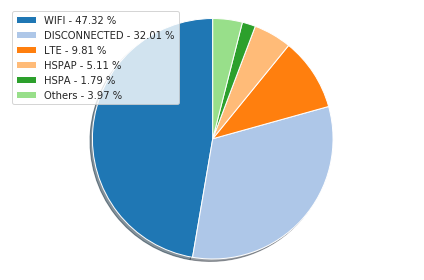

In [8]:
print(dfNetworkStatusGB)

pieOthers(dfNetworkStatusGB['network_status'], dfNetworkStatusGB['count'],5)


  screen_on     count
0        No  11889736
1       Yes  11176391


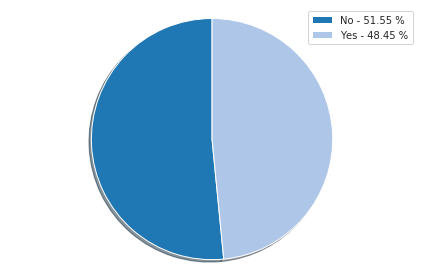

In [9]:
print(dfScreenOnGB)

pieOthers(dfScreenOnGB['screen_on'], dfScreenOnGB['count'],0)


                           timezone    count
155                    ASIA/JAKARTA  3695832
236                   EUROPE/LISBON  2348589
204                ATLANTIC/MADEIRA  1866909
104                AMERICA/NEW_YORK  1032985
98              AMERICA/MEXICO_CITY   916696
119               AMERICA/SAO_PAULO   830778
144                   ASIA/CALCUTTA   714830
66                  AMERICA/CHICAGO   689727
160                    ASIA/KARACHI   657195
140                    ASIA/BANGKOK   526635
172                     ASIA/MANILA   522418
238                   EUROPE/LONDON   437567
244                   EUROPE/MOSCOW   361608
50   AMERICA/ARGENTINA/BUENOS_AIRES   323641
171                   ASIA/MAKASSAR   321381
91                     AMERICA/LIMA   308557
57                    AMERICA/BELEM   307733
92              AMERICA/LOS_ANGELES   290006
246                    EUROPE/PARIS   252230
59                   AMERICA/BOGOTA   234087


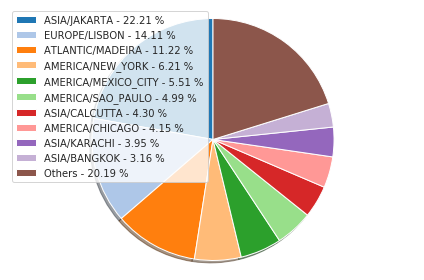

In [10]:
print(dfTimezoneGB)

pieOthers(dfTimezoneGB['timezone'], dfTimezoneGB['count'],10)


    country_code    count
137           pt  4362680
75            id  4015493
172      unknown  2013308
173           us  1759824
21            br  1462220
118           mx   937698
78            in   885514
135           pk   612324
161           th   499651
134           ph   479795
143           ru   420891
7             ar   309861
132           pe   282246
12            bd   230952
35            co   220874
54            fr   219888
45            dz   198979
50            es   185145
56            gb   167245
119           my   156494


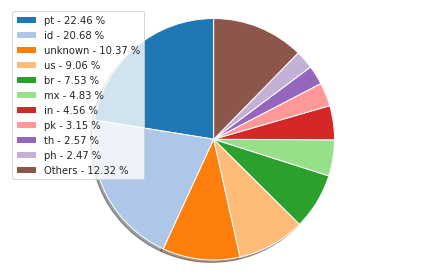

In [11]:
print(dfCountryGB)

pieOthers(dfCountryGB['country_code'], dfCountryGB['count'],10)
